# Modelo de Regresion Lineal
### Datos ficticios

* y = a + b * x

* x : Sera una normal con 100 valores N(1.5,2.5)
* Ye = 2 + 0.3 * x
* e: estara adistribuida segun una N(0,0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)


In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x

In [5]:
y_act = 5 + 1.9 * x + res

In [6]:
x_list = x.tolist()

In [7]:
y_pred_list = y_pred.tolist()

In [8]:
y_act_list = y_act.tolist()

In [9]:
data = pd.DataFrame({
    'X': x_list,
    'Y': y_act_list,
    'Y_pred': y_pred_list
})

In [10]:
data

,X,Y,Y_pred
0,1.350043,8.624028,7.565082
1,1.083467,6.818152,7.058587
2,0.346215,6.700893,5.657808
3,-2.077308,0.181479,1.053115
4,1.765149,7.745177,8.353784
...,...,...,...
95,1.108884,8.059495,7.106880
96,1.200126,7.610506,7.280239
97,-3.454371,-2.547231,-1.563304
98,2.580659,10.669320,9.903252


In [11]:
%matplotlib inline

In [12]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor actual vs prediccion')

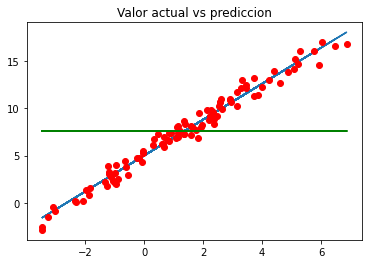

In [13]:
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean,"g")
plt.title("Valor actual vs prediccion")

In [14]:
data["SSR"] = (data["Y_pred"] - np.mean(y_act)) ** 2
data["SSD"] = (data["Y_pred"] - data["Y"]) ** 2
data["SST"] = (data["Y"] - np.mean(y_act)) ** 2

In [15]:
data.head()

,X,Y,Y_pred,SSR,SSD,SST
0,1.350043,8.624028,7.565082,0.000956,1.121367,1.056825
1,1.083467,6.818152,7.058587,0.288822,0.057809,0.605060
2,0.346215,6.700893,5.657808,3.756621,1.088026,0.801232
3,-2.077308,0.181479,1.053115,42.809453,0.759749,54.975241
4,1.765149,7.745177,8.353784,0.574224,0.370402,0.022251


In [16]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [17]:
SSR

2048.2866242862374

In [18]:
SSD

50.931934159134485

In [19]:
SST

2145.3105928572995

In [20]:
R2 = SSR / SST

In [21]:
R2

0.9547739292883285

(array([ 1.,  7., 12., 15., 14., 16., 15., 11.,  7.,  2.]),
 array([-1.6873187 , -1.35279044, -1.01826217, -0.6837339 , -0.34920564,
        -0.01467737,  0.31985089,  0.65437916,  0.98890743,  1.32343569,
         1.65796396]),
 <BarContainer object of 10 artists>)

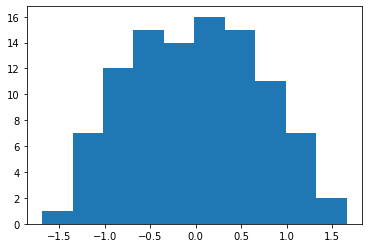

In [22]:
plt.hist(data["Y_pred"] - data["Y"])

## Obteniendo la regresion de la recta
* y = a + b * x
* b = sum(xi - xm) * (yi - ym) / sum((xi - xm) ^ 2)
* a = yn - b * xm

In [23]:
x_mean = np.mean(data["X"])
y_mean = np.mean(data["Y"])

In [24]:
data["beta_n"] = (data["X"]-x_mean) * (data["Y"]- y_mean)

In [25]:
data["beta_d"] = (data["X"]-x_mean) ** 2

In [26]:
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [27]:
alpha = y_mean - beta * x_mean

In [28]:
alpha, beta

(4.971014455509506, 1.921377595070592)

In [29]:
data["y_model"] = alpha + beta * data["X"]

In [30]:
data.head()

,X,Y,Y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.350043,8.624028,7.565082,0.000956,1.121367,1.056825,-0.016614,0.000261,7.564957
1,1.083467,6.818152,7.058587,0.288822,0.057809,0.605060,0.219929,0.079940,7.052763
2,0.346215,6.700893,5.657808,3.756621,1.088026,0.801232,0.913008,1.040378,5.636223
3,-2.077308,0.181479,1.053115,42.809453,0.759749,54.975241,25.532019,11.857774,0.979721
4,1.765149,7.745177,8.353784,0.574224,0.370402,0.022251,0.059510,0.159157,8.362533


In [31]:
SSR = sum((data["y_model"] - y_mean) ** 2)
SSD = sum((data["y_model"] - data["Y"]) ** 2)
SST = sum((data["Y"] - y_mean) ** 2)

SSR,SSD,SST

(2094.637962790264, 50.67263006703448, 2145.310592857299)

In [32]:
R2 = SSR/SST

In [33]:
R2

0.976379816407122

(array([ 1.,  7., 12., 15., 14., 16., 15., 11.,  7.,  2.]),
 array([-1.6873187 , -1.35279044, -1.01826217, -0.6837339 , -0.34920564,
        -0.01467737,  0.31985089,  0.65437916,  0.98890743,  1.32343569,
         1.65796396]),
 <BarContainer object of 10 artists>)

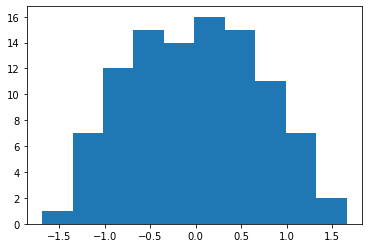

In [34]:
plt.hist(data["Y_pred"] - data["Y"])

Text(0.5, 1.0, 'Valor actual vs prediccion')

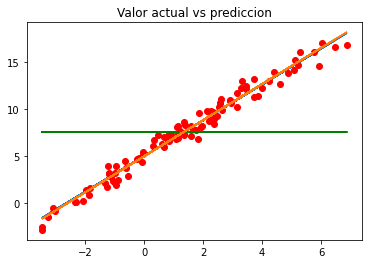

In [35]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
plt.plot(data["X"],data["Y_pred"])
plt.plot(data["X"],data["Y"], "ro")
plt.plot(data["X"],y_mean,"g")
plt.plot(data["X"], data["y_model"])
plt.title("Valor actual vs prediccion")

## Error estandar de los residuos (RSE)
* La formula es: SSD/n-2

In [36]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7190741642871408

In [38]:
## El error es del 9 porciento solamente
RSE / np.mean(data["Y"])

0.09466474363825292